In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [2]:
austin_weather_data = pd.read_csv("data/austin_weather.csv")
austin_weather_data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


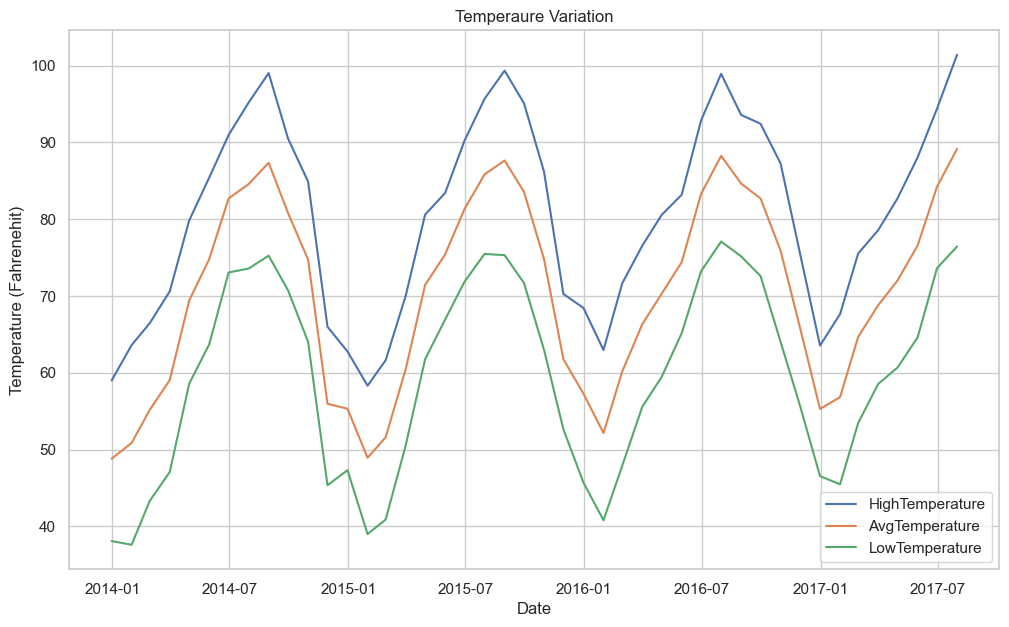

In [30]:
df = austin_weather_data
df["Date"] = pd.to_datetime(df["Date"])
month_df = df.groupby(df['Date'].dt.to_period('M'))

monthly_mean = pd.DataFrame(index=pd.date_range(start=df["Date"].iloc[0], end=df["Date"].iloc[-1], freq='M'))
monthly_mean['TempHighF'] = month_df['TempHighF'].mean().values
monthly_mean['TempAvgF'] = month_df['TempAvgF'].mean().values
monthly_mean['TempLowF'] = month_df['TempLowF'].mean().values
monthly_mean

plt.figure(figsize=(12,7))
plt.title('Temperaure Variation')
plt.plot(monthly_mean['TempHighF'], label='HighTemperature')
plt.plot(monthly_mean['TempAvgF'], label='AvgTemperature')
plt.plot(monthly_mean['TempLowF'], label='LowTemperature')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenehit)')
plt.legend(loc = 4)
plt.show()